In [0]:
import numpy as np
import pandas as pd

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import tensorflow as tf

In [7]:
# temporariliy suppress deprecation warnings (https://stackoverflow.com/questions/49901806/tensorflow-importing-mnist-warnings)
old_v = tf.logging.get_verbosity()
tf.logging.set_verbosity(tf.logging.ERROR)

# load mnist data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

# revert logging settings
tf.logging.set_verbosity(old_v)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [8]:
mnist.train.images.shape

(55000, 784)

In [0]:
# Build neural network
X = tf.placeholder(dtype='float', shape=[None, 784])
y = tf.placeholder(dtype='float', shape=[None, 10])

std = 0.05

weights = {
    'w1': tf.Variable(dtype='float', initial_value=tf.truncated_normal(shape=[784, 1024], mean=0.0, stddev=std)),
    'w2': tf.Variable(dtype='float', initial_value=tf.truncated_normal(shape=[1024, 1024], mean=0.0, stddev=std)),
    'w3': tf.Variable(dtype='float', initial_value=tf.truncated_normal(shape=[1024, 1024], mean=0.0, stddev=std)),
    'w4': tf.Variable(dtype='float', initial_value=tf.truncated_normal(shape=[1024, 1024], mean=0.0, stddev=std)),
    'w5': tf.Variable(dtype='float', initial_value=tf.truncated_normal(shape=[1024, 1024], mean=0.0, stddev=std)),
    'out': tf.Variable(dtype='float', initial_value=tf.truncated_normal(shape=[1024, 10], mean=0.0, stddev=std)),
}

biases = {
    'b1': tf.Variable(dtype='float', initial_value=tf.truncated_normal(shape=[1024], mean=0.0, stddev=std)),
    'b2': tf.Variable(dtype='float', initial_value=tf.truncated_normal(shape=[1024], mean=0.0, stddev=std)),
    'b3': tf.Variable(dtype='float', initial_value=tf.truncated_normal(shape=[1024], mean=0.0, stddev=std)),
    'b4': tf.Variable(dtype='float', initial_value=tf.truncated_normal(shape=[1024], mean=0.0, stddev=std)),
    'b5': tf.Variable(dtype='float', initial_value=tf.truncated_normal(shape=[1024], mean=0.0, stddev=std)),
    'out': tf.Variable(dtype='float', initial_value=tf.truncated_normal(shape=[10], mean=0.0, stddev=std))
}

In [0]:
beta = 0.001

z1 = tf.add(tf.matmul(X, weights['w1']), biases['b1'])
a1 = tf.nn.relu(z1)

z2 = tf.add(tf.matmul(a1, weights['w2']), biases['b2'])
a2 = tf.nn.relu(z2)

z3 = tf.add(tf.matmul(a2, weights['w3']), biases['b3'])
a3 = tf.nn.relu(z3)

z4 = tf.add(tf.matmul(a3, weights['w4']), biases['b4'])
a4 = tf.nn.relu(z4)

z5 = tf.add(tf.matmul(a4, weights['w5']), biases['b5'])
a5 = tf.nn.relu(z5)

logits = tf.add(tf.matmul(a5, weights['out']), biases['out'])
output = tf.nn.softmax(logits=logits)

regularizers = tf.nn.l2_loss(weights['w1']) + tf.nn.l2_loss(weights['w2']) + tf.nn.l2_loss(weights['w3']) \
                + tf.nn.l2_loss(weights['w4']) + tf.nn.l2_loss(weights['w5']) + tf.nn.l2_loss(weights['out'])
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=y) \
                + beta * regularizers)

optimizer = tf.train.AdamOptimizer(learning_rate=0.01)

train = optimizer.minimize(loss=loss)

# calculate accuracy
correct = tf.equal(tf.argmax(input=logits, axis=1), tf.argmax(input=y, axis=1))
accuracy = tf.reduce_mean(tf.cast(dtype='float', x=correct))

init = tf.global_variables_initializer()

In [31]:
batch_size = 1000
total_samples = mnist.train.images.shape[0]

with tf.Session() as sess:
  sess.run(init)
  for epoch in range(1, 101):
    for itr in range(total_samples//batch_size):
      batch_x, batch_y = mnist.train.next_batch(batch_size=batch_size)
      sess.run(train, feed_dict={X: batch_x, y: batch_y})
#       if itr % 10 == 0:
#         ls, ac = sess.run([loss, accuracy], feed_dict={X: batch_x, y: batch_y})
#         print(f'\tIteration:{itr}\t, Loss:{ls:.2f}\t, Accuracy:{ac:.2f}')
    if epoch % 50 == 0:
      print(f'Epoch:{epoch}')
      ls, ac = sess.run([loss, accuracy], feed_dict={X: batch_x, y: batch_y})
      print(f'Train set:\tLoss:{ls:.2f},\tAccuracy:{ac:.2f}')
      ls, ac = sess.run([loss, accuracy], feed_dict={X: mnist.test.images, y: mnist.test.labels})
      print(f'Test set:\tLoss:{ls:.2f},\tAccuracy:{ac:.2f}\n')

  # pass 1000 images through trained model and get 10 images per output class giving maximum softmax activation
  batch_x, batch_y = mnist.test.next_batch(1000)
  a5_val, output_val = sess.run([a5, output], feed_dict={X:batch_x, y:batch_y})

Epoch:50
Train set:	Loss:0.18,	Accuracy:0.99
Test set:	Loss:0.22,	Accuracy:0.97

Epoch:100
Train set:	Loss:0.17,	Accuracy:0.98
Test set:	Loss:0.19,	Accuracy:0.97



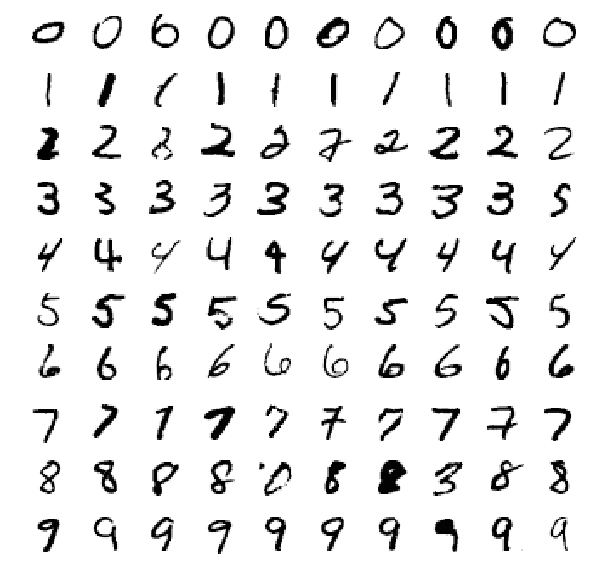

In [30]:
plt.figure(figsize=(10, 10))
for d in range(10):
  d_images = batch_x[np.argmax(output_val, axis=1) == d]
  d_images = d_images[:min(10, len(d_images))]
  for i in range(len(d_images)):
    plt.subplot(10, 10, d * 10 + i + 1)
    plt.imshow(d_images[i].reshape(28, 28))
    plt.axis('off')

In [32]:
a5_val.shape

(1000, 1024)

In [37]:
a5_val[:, np.random.randint(1024, size=10)].shape

(1000, 10)

In [40]:
plt.figure(figsize=(10, 10))
for d in range(10):
  d_images = batch_x[np.argmax(a5_val, axis=1) == d]
  d_images = d_images[:min(10, len(d_images))]
  for i in range(len(d_images)):
    plt.subplot(10, 10, d * 10 + i + 1)
    plt.imshow(d_images[i].reshape(28, 28))
    plt.axis('off')

<Figure size 720x720 with 0 Axes>